In [159]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import re

import urllib

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h2>1. Data acquisition</h2>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Here we load the relevant data using the <span style="font-family: monospace">pandas</span> library. The data we are dealing with follows a relational model. The specific navigation paths can be represented as graphs where the nodes concern the wikipedia pages that are connected through (directional) edges representing the hyperlinks.
    </span>
</div>

In [197]:
#Import relevant DataFrames

#Articles data
articles = pd.read_csv("data/articles.tsv", skiprows=11, names=["article"])
articles['article'] = articles['article'].apply(urllib.parse.unquote) #Parsing URL encoding

#Category data
categories = pd.read_csv("data/categories.tsv", sep="\t", skiprows=12, names=["article", "category"])
categories["article"] = categories["article"].apply(urllib.parse.unquote) #Parsing URL encoding

#Links data
links = pd.read_csv("data/links.tsv", sep="\t", skiprows=11, names=["article", "link"])
links["article"] = links["article"].apply(urllib.parse.unquote) #Parsing URL encoding
links["link"] = links["link"].apply(urllib.parse.unquote) #Parsing URL encoding

#Finished paths
paths_finished = pd.read_csv("data/paths_finished.tsv", sep="\t", skiprows=15, names=["hashedIpAddress",
                                                                                      "timestamp",
                                                                                      "durationInSec",
                                                                                      "path",
                                                                                      "rating"])
paths_finished["path"] = paths_finished["path"].apply(urllib.parse.unquote) #Parsing URL encoding

#Unfinished paths
paths_unfinished = pd.read_csv("data/paths_unfinished.tsv", sep="\t", skiprows=16, names=["hashedIpAddress",
                                                                                          "timestamp",
                                                                                          "durationInSec",
                                                                                          "path",
                                                                                          "target",
                                                                                          "type"])
paths_unfinished["path"] = paths_unfinished["path"].apply(urllib.parse.unquote) #Parsing URL encoding
paths_unfinished["target"] = paths_unfinished["target"].apply(urllib.parse.unquote) #Parsing URL encoding

#shortest path matrix
with open('data/shortest-path-distance-matrix.txt', 'r') as file:
    
    #Initialize shortest_path_distance list
    shortest_path_distance = []
    
    for line in file:
        
        #Check if the first character of the line is either a digit or underscore
        if re.search("([0-9]|_)", line[0]): 
            
            #Append list to shortest_path_distance
            shortest_path_distance.append([np.nan if x=='_' else int(x) for x in line.strip()])
    
#Convert to numpy ndarray
shortest_path_distance = np.array(shortest_path_distance)    
    


</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h2>2. Data exploration</h2>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        We will now explore the data.
    </span>
</div>

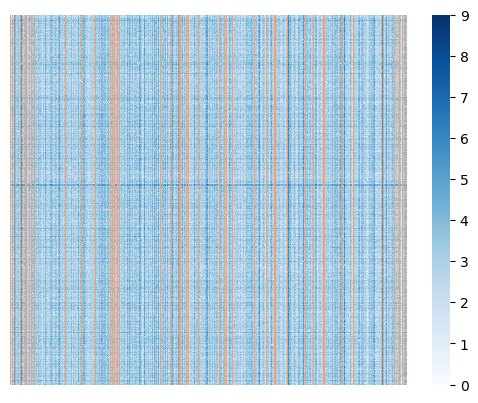

In [222]:
g = sns.heatmap(shortest_path_distance, xticklabels=False, yticklabels=False, linewidths=0, cmap='Blues');
g.set_facecolor('#f79d6f')